# Exploratory Data Analysis (EDA) & Pre-processing steps

## `CUSTOMERS` dataset:

- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns)

This notebook performs Exploratory Data Analysis and pre-processing (data standarization and cleaning) of the `CUSTOMERS` dataset containing demographics for the general population of Germany.

**The processing steps are analogical as with `EDA_AZDIAS.ipynb` notebook**

# 00. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm    
%matplotlib inline


### my utils

from eda_utils import *

---
# 01. Import dataset

In [2]:
! head -n 2 ../arvato_data/Udacity_CUSTOMERS_052018.csv  # comma-separated list of features

LNR;AGER_TYP;AKT_DAT_KL;ALTER_HH;ALTER_KIND1;ALTER_KIND2;ALTER_KIND3;ALTER_KIND4;ALTERSKATEGORIE_FEIN;ANZ_HAUSHALTE_AKTIV;ANZ_HH_TITEL;ANZ_KINDER;ANZ_PERSONEN;ANZ_STATISTISCHE_HAUSHALTE;ANZ_TITEL;ARBEIT;BALLRAUM;CAMEO_DEU_2015;CAMEO_DEUG_2015;CAMEO_INTL_2015;CJT_GESAMTTYP;CJT_KATALOGNUTZER;CJT_TYP_1;CJT_TYP_2;CJT_TYP_3;CJT_TYP_4;CJT_TYP_5;CJT_TYP_6;D19_BANKEN_ANZ_12;D19_BANKEN_ANZ_24;D19_BANKEN_DATUM;D19_BANKEN_DIREKT;D19_BANKEN_GROSS;D19_BANKEN_LOKAL;D19_BANKEN_OFFLINE_DATUM;D19_BANKEN_ONLINE_DATUM;D19_BANKEN_ONLINE_QUOTE_12;D19_BANKEN_REST;D19_BEKLEIDUNG_GEH;D19_BEKLEIDUNG_REST;D19_BILDUNG;D19_BIO_OEKO;D19_BUCH_CD;D19_DIGIT_SERV;D19_DROGERIEARTIKEL;D19_ENERGIE;D19_FREIZEIT;D19_GARTEN;D19_GESAMT_ANZ_12;D19_GESAMT_ANZ_24;D19_GESAMT_DATUM;D19_GESAMT_OFFLINE_DATUM;D19_GESAMT_ONLINE_DATUM;D19_GESAMT_ONLINE_QUOTE_12;D19_HANDWERK;D19_HAUS_DEKO;D19_KINDERARTIKEL;D19_KONSUMTYP;D19_KONSUMTYP_MAX;D19_KOSMETIK;D19_LEBENSMITTEL;D19_LETZTER_KAUF_BRANCHE;D19_LOTTO;D19_NAHRUNGSERGAENZUNG;D19_RATGEBE

In [3]:
# count features
!head -n 1 ../arvato_data/Udacity_CUSTOMERS_052018.csv | tr ";" "\n" | wc -l

369


We see that `customers` dataset at first glance might have 3 more features than `AZDIAS`, although the names of the features need to be checked

I have a machine with 32GB of RAM, so the dataset can be loaded and pre-processed in memory. Hence low_memory = False, allows for faster loads and better column type inference.


In [4]:
%%time
customers = pd.read_csv('../arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';', low_memory = False, index_col = 'LNR') 
customers

CPU times: user 7.42 s, sys: 852 ms, total: 8.27 s
Wall time: 8.27 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,NaN,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,0.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154561,1,1.0,9.0,NaN,NaN,NaN,NaN,9.0,1.0,0.0,...,5.0,6.0,9.0,1.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,3
154563,-1,2.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,4.0,NaN,9.0,3.0,3,COSMETIC,SINGLE_BUYER,0,2,4
148813,2,1.0,15.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,5.0,3.0,9.0,3.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4


---
# 02. Missing features



## 02.01. Intro

Before exploring the values contained in the cells, it is essential to understand how many missing values are present. I.e. values that were **not entered**, now "unknown" from the perspective of the data curator, the latter will come later.

CPU times: user 325 ms, sys: 44.1 ms, total: 369 ms
Wall time: 368 ms


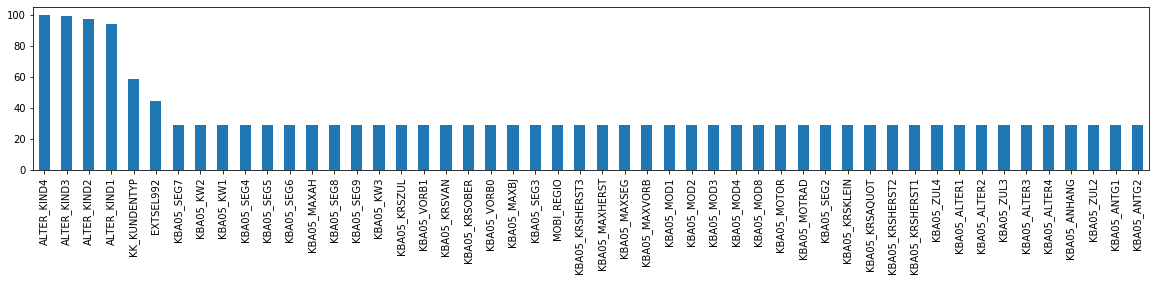

In [5]:
%%time
empty_cells = pd.isnull(customers).sum()*100.0/customers.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

(Above) a barplot showing 50 most missing features, ordered by the percentage of missing values.

(Below) Histogram showing that most features have NAs less than 30% values. 
 


[]

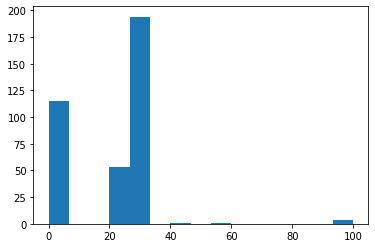

In [6]:
plt.hist(empty_cells,bins=15)
plt.plot()

For subsequent steps in pre-processing, I will be establishing a cutoff threshold for a feature removal: called `missingness_threshold_percentage`. 
> If a feature is missing more or equal to `missingness_threshold_percentage`% of its entries, I am removing that feature from subsequent analysis. Since the data is describing **customers population**, and high values of missingness might introduce a lot of spuriousness to the analysis. 


In [7]:
missingness_threshold_percentage=30

## 02.02. Undefined features

I am utilizing provided matadata file `DIAS Attributes - Values 2017.xlsx` to extract the possible value types for defined features (columns in `azidas` dataset).

Due to the specific formatting, a forward-fill function is applied `ffill`. 

Upon manual inspection, the values for "unknown" are sometimes encoded as -1, sometimes as 0 or 9, and sometimes as both -1,9 or 0. But there are features in which for example 0 does not mean unknown. And there are features marked with string `...` indicating a **float values**, as opposed to a categorical one.

In this step, I am going to count number of "unknown" entries per feature. The idea is that "missing entries" (point 02.01) and unknown entries "02.02" might have different sources, but inevitabely lead to the same conclusions for the sake of the analysis -> unavailable data.

I am going to use the keyword "unknown" to match the values in the column "meaning", to extract a dataframe of attributes and its values defining unknown entries:

In [8]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
customers,missing_metadata_annotations,not_present_features = unknown_to_nan(customers, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [9]:
print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

96 dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


## 02.03-04. Features renaming /  correction

Analogically to `AZDIAS` dataset, the names of some features need to be changed, to match those defined in metadata Excel file. 

I am going to re-use previously implemented function:


In [10]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
customers,missing_metadata_annotations,not_present_features = unknown_to_nan(customers, metadata_attributes , 'unknown|no transactions known',
                                                                         rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [11]:
print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

58 dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


CPU times: user 331 ms, sys: 23.7 ms, total: 355 ms
Wall time: 355 ms


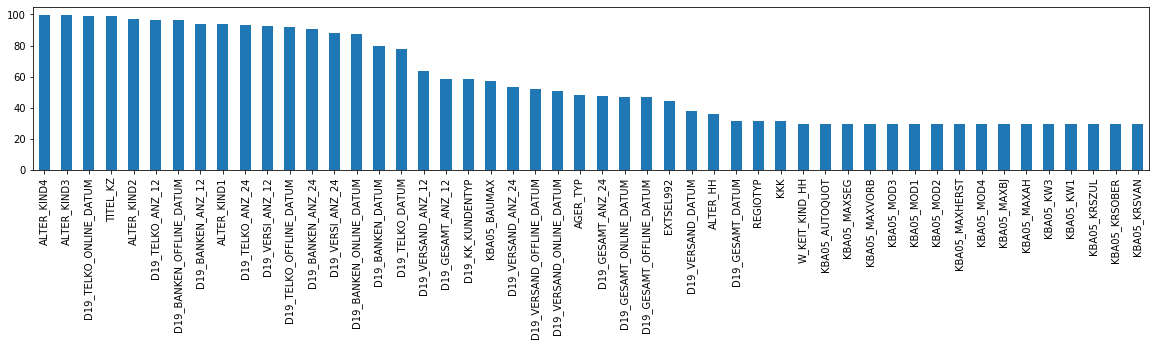

In [12]:
%%time
empty_cells = pd.isnull(customers).sum()*100.0/customers.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

In [13]:
np.sum(empty_cells>missingness_threshold_percentage)

34

With current thresholding defined by `missingness_threshold_percentage`, 34 features will drop from `customers` dataset due to high values of missingness (above the threshold)

## 02.05. Feature missingness filtering


After identifying number of empty cells (`NaNs`, and converting unknown values to `NaNs` I'll filter (remove) features that exhibit missingnes above `missingness_threshold_percentage`

In [14]:
%%time
features_to_drop =list( (empty_cells[empty_cells>missingness_threshold_percentage]).index.values)
customers.drop(labels=features_to_drop,inplace=True,axis='columns')


CPU times: user 88 ms, sys: 96.4 ms, total: 184 ms
Wall time: 183 ms


Plot again missingness after removal:

CPU times: user 356 ms, sys: 35.6 ms, total: 392 ms
Wall time: 391 ms


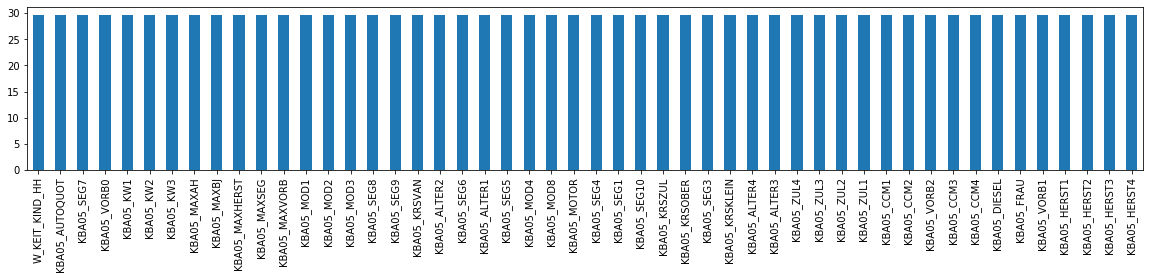

In [15]:
%%time
empty_cells = pd.isnull(customers).sum()*100.0/customers.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

all of the features have at most `missingness_threshold_percentage` percent of missigness

---
# 03. Missing rows

After we've removed highly incomplete features of our dataset, we'd have to make sure that the individuals present in the dataset (row entries) don't exhibit high missingness. 

We must remove row entries (i.e. subjects) for which a substantial portion of information is missing. I am going to apply **different missingness** threshold `row_missingness_threshold_percentage` to filter entries (rows) - **defined at 50%**. The reason is that I'll be later imputing missing values based, and believe with 50% of entries present per subjects, and a big dataset of general population, I'll be able to successfully impute missing values with features having at most `missingness_threshold_percentage` (set to 30%) missing entries

CPU times: user 313 ms, sys: 28 ms, total: 341 ms
Wall time: 338 ms


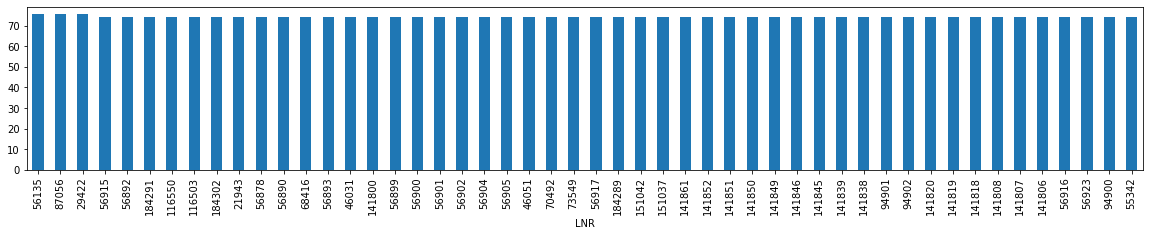

In [16]:
%%time
empty_rows = pd.isnull(customers).sum(axis=1)*100.0/customers.shape[1]
empty_rows = empty_rows.sort_values(ascending=False)
empty_rows[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

[]

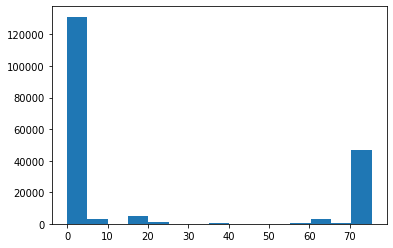

In [17]:
plt.hist(empty_rows,bins=15)
plt.plot()

In [18]:
row_missingness_threshold_percentage = 50

In [19]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows>row_missingness_threshold_percentage)*100/customers.shape[0]

26.500114791392733

We see that around 26.5% of customers data have more than 50% of their features missing. 

This is a substantial portion of missingness. And upon inspecting the histogram we see that for around 75% of the customers, we have almost complete information. There is a big chunk of customers (~25%) that exhibit missingness of above 70%). 

This missingness of a quarter of customer information poses an analytical challenge. Ideally we'd like not to remove these individuals, and use all information possible to perform customer segmentation.

For the first step, I am going however to remove these highly missing individuals, and perhaps revisit this step later in the analysis.

In [20]:
%%time
samples_to_drop =list( (empty_rows[empty_rows>row_missingness_threshold_percentage]).index.values)
customers.drop(index=samples_to_drop,inplace=True,axis='index')

CPU times: user 107 ms, sys: 72.2 ms, total: 180 ms
Wall time: 179 ms


CPU times: user 222 ms, sys: 56.4 ms, total: 278 ms
Wall time: 276 ms


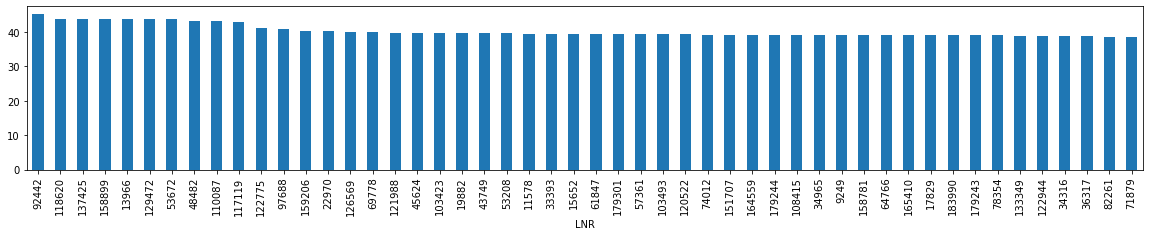

In [21]:
%%time
empty_rows = pd.isnull(customers).sum(axis=1)*100.0/customers.shape[1]
empty_rows = empty_rows.sort_values(ascending=False)
empty_rows[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

---
# 04. Data types & feature encoding



We know (from inspecting metadata file ` DIAS Attributes - Values 2017.xlsx`) that some features are encoded as floats, some are presented as ordinal features (where relative order matters), and some are pure categorial features, for example gender. These features need to be properly encoded.

## Features lacking metadata information

First however, let's inspect the unique values the features which lack metadata information hold:


In [22]:
# re-run previous function, to update the list of some deleted columns
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
customers,missing_metadata_annotations,not_present_features = unknown_to_nan(customers, metadata_attributes , 'unknown|no transactions known',
                                                                         rename_columns='azdias_corrected_features.tsv') 

print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

Since we filtered some features based on missingness, the number of unused features for which we have metadata rose from 4 -> 33. which is ok.

In [23]:
missing_metadata_feature_info =  {}
missing_metadata_feature_info['Attribute'] = []
missing_metadata_feature_info['unique_counts'] = []
missing_metadata_feature_info['unique_vals'] = []

for f in missing_metadata_annotations:
    unique_vals =  np.unique(customers[f].dropna() )
    
    missing_metadata_feature_info['Attribute'].append(f)
    
    missing_metadata_feature_info['unique_counts'].append(len(unique_vals))
    missing_metadata_feature_info['unique_vals'].append(unique_vals)   
    
missing_metadata_feature_info = pd.DataFrame.from_dict(missing_metadata_feature_info)
missing_metadata_feature_info.sort_values('unique_counts',ascending=False, inplace=True)
missing_metadata_feature_info

,Attribute,unique_counts,unique_vals
18,EINGEFUEGT_AM,2770,"[1992-02-10 00:00:00, 1992-02-12 00:00:00, 199..."
12,ANZ_STATISTISCHE_HAUSHALTE,214,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
40,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
4,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK..."
44,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991...."
47,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
13,VK_DISTANZ,13,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
16,VK_DHT4A,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
23,VK_ZG11,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
24,D19_VERSI_DATUM,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


Here I am sorting in an ascending manner the the number of unique values. 

As was the case with `AZDIAS` dataset, we'll assume that all but some features are categorical in nature since we don't any information for this metadata.

- `EINGEFUEGT_AM` feature will be removed (reasoning in `AZDIAS` jupyter noteobok)

`ANZ_STATISTISCHE_HAUSHALTE` [**to be encoded as numerical**]: (reasonin in `AZDIAS` notebook)

- ... remaining features to be interpreted as categorical

In [24]:
missing_metadata_feature_info['Type']= 'categorical' # categorical as default

##### dropping EINGEFUEGT_AM_idx 

### from `missing_metadata_feature_info`
EINGEFUEGT_AM_idx = missing_metadata_feature_info.loc[missing_metadata_feature_info['Attribute']=='EINGEFUEGT_AM'].index.values
missing_metadata_feature_info.drop(axis='index', inplace=True, index = EINGEFUEGT_AM_idx )


EINGEFUEGT_AM_idx = missing_metadata_feature_info.loc[missing_metadata_feature_info['Attribute']=='EINGEFUEGT_AM'].index.values
missing_metadata_feature_info.loc[missing_metadata_feature_info.Attribute=='ANZ_STATISTISCHE_HAUSHALTE', 'Type'] = 'numerical'

### from AZDIAS
try:
    customers.drop(columns='EINGEFUEGT_AM',inplace=True)
except KeyError:
    print("EINGEFUEGT_AM already deleted from AZDIAS")

    
missing_metadata_feature_info

,Attribute,unique_counts,unique_vals,Type
12,ANZ_STATISTISCHE_HAUSHALTE,214,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
40,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",categorical
4,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK...",categorical
44,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991....",categorical
47,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical
13,VK_DISTANZ,13,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical
16,VK_DHT4A,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical
23,VK_ZG11,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical
24,D19_VERSI_DATUM,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",categorical
5,D19_VERSI_OFFLINE_DATUM,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",categorical


## Exploring feature types

Let's visualize auto-inferred by pandas data types

(array([261.,   0.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,  65.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

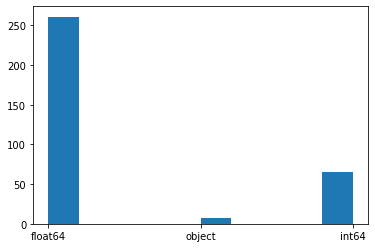

In [25]:
plt.hist([str(x) for x in (customers.dtypes).to_numpy().squeeze()])

Pandas tries best, but since all categorical/ordinal/numerical features are encoded as numbers, they are some form of a number: integer or float.

Interestingly there are some 7 features that are encoded as objects:

In [26]:
customers.loc[:,customers.dtypes=="object" ].head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_DEUINTL_2015,D19_LETZTER_KAUF_BRANCHE,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
LNR,,,,,,,
9626,1A,1,13,D19_UNBEKANNT,W,COSMETIC_AND_FOOD,MULTI_BUYER
143872,5D,5,34,D19_UNBEKANNT,W,COSMETIC_AND_FOOD,MULTI_BUYER
143873,4C,4,24,D19_NAHRUNGSERGAENZUNG,W,COSMETIC,MULTI_BUYER
143874,7B,7,41,D19_SCHUHE,W,FOOD,MULTI_BUYER
143888,5D,5,34,D19_BUCH_CD,W,COSMETIC_AND_FOOD,MULTI_BUYER


Upon inspection, they are encoded as such, because they usually contain a mix of (auto-inferred) types: integer and **string**. 

**Manual inspection.**
I went over manually over the provided metadata informaiton: `DIAS Attributes - Values 2017` and based on descriptions and provided feature values, encoded each variable type as either:
- categorical
- numerical
- ordinal

Combining this information (stored in `metadata_feature_types.tsv`) with assumed types of features that lack the metadata annotations (dataframe `missing_metadata_feature_info`) I create a lookup table of expected feature types:


(array([ 81.,   0.,   0.,   0.,   0., 244.,   0.,   0.,   0.,   8.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

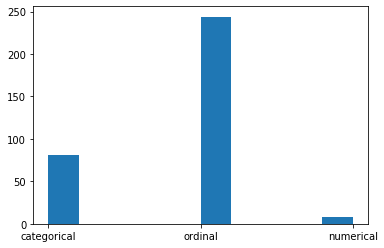

In [27]:
missing_metadata_feature_info = missing_metadata_feature_info[['Attribute','Type']]

all_feature_types = pd.read_csv('metadata_feature_types.tsv',sep="\t").dropna()
all_feature_types = pd.concat([all_feature_types,missing_metadata_feature_info])

# must be in Azdias
all_feature_types.index = all_feature_types['Attribute']
# features that have filtered AZDIAS entry
all_feature_types = all_feature_types.loc[ set(all_feature_types['Attribute'] ).intersection( (set(customers.columns  )))  ]

plt.hist(all_feature_types['Type'])

# Saving

At this point, the `customers` dataset is initially cleanded: missing values are encoded properly with `NA`s, and we've identified feature data types. 

The next steps would involve combining `customers` and `AZDIAS` dataset, addressing missing values, encoding features, and later unsupervised analysis.

In [28]:
customers.to_csv("../arvato_data_processed/customers.csv") 

In [29]:
all_feature_types.to_csv("../arvato_data_processed/customers_feature_types.csv") 

# TODO: remore below [EXPERIMENTS]